# Question 1

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')

In [2]:
# Mean age per occupation
mean_age_per_occupation = users.groupby('occupation').age.mean()

mean_age_per_occupation

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [3]:
# Male ratio per occupation, sorted
male_ratio = users[users.gender == 'M'].groupby('occupation').gender.count() / users.groupby('occupation').gender.count()
male_ratio_sorted = male_ratio.sort_values(ascending=False)

male_ratio_sorted

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64

In [4]:
# Minimum and maximum ages per occupation
min_max_age_per_occupation = users.groupby('occupation').age.agg(['min', 'max'])

min_max_age_per_occupation

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [5]:
# Mean age per occupation and sex
mean_age_occupation_sex = users.groupby(['occupation', 'gender']).age.mean()

mean_age_occupation_sex

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [6]:
# Percentage of women and men per occupation
gender_count_per_occupation = users.groupby(['occupation', 'gender']).gender.count().unstack()
gender_percentage_per_occupation = gender_count_per_occupation.div(gender_count_per_occupation.sum(axis=1), axis=0) * 100

gender_percentage_per_occupation

gender,F,M
occupation,,
administrator,45.569620,54.430380
artist,46.428571,53.571429
doctor,NaN,100.000000
educator,27.368421,72.631579
engineer,2.985075,97.014925
entertainment,11.111111,88.888889
executive,9.375000,90.625000
healthcare,68.750000,31.250000
homemaker,85.714286,14.285714


# Question 2

In [7]:
import pandas as pd

# Import the dataset
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url)


In [8]:
# Select only the Goal column
goals = euro12['Goals']

goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [9]:
# Number of teams that participated in Euro2012
num_teams = euro12.Team.nunique()

num_teams

16

In [10]:
# Number of columns in the dataset
num_columns = euro12.shape[1]

num_columns

35

In [11]:
# DataFrame with Team, Yellow Cards, and Red Cards
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [12]:
# Sort teams by Red Cards, then by Yellow Cards
discipline_sorted = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=[False, False])

discipline_sorted

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [13]:
# Mean Yellow Cards per team
mean_yellow_cards = euro12['Yellow Cards'].mean()

mean_yellow_cards

7.4375

In [14]:
# Filter teams that scored more than 6 goals
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]

teams_more_than_6_goals

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [15]:
# Select teams that start with G
teams_start_with_g = euro12[euro12['Team'].str.startswith('G')]

teams_start_with_g

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [16]:
# Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]

first_7_columns

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [17]:
# Select all columns except the last 3
except_last_3_columns = euro12.iloc[:, :-3]

except_last_3_columns

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [18]:
# Shooting Accuracy from England, Italy, and Russia
shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
shooting_accuracy

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

In [19]:
import pandas as pd
import numpy as np

# Create 3 different Series
s1 = pd.Series(np.random.randint(1, 5, 100))
s2 = pd.Series(np.random.randint(1, 4, 100))
s3 = pd.Series(np.random.randint(10000, 30001, 100))


In [20]:
# Create DataFrame by joining the Series by column
df = pd.concat([s1, s2, s3], axis=1)

df

,0,1,2
0,3,1,18558
1,2,1,27965
2,1,2,24972
3,4,2,27836
4,1,1,27064
...,...,...,...
95,4,3,26830
96,1,2,28789
97,3,1,15678
98,4,2,21684


In [21]:
# Change the column names
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

df

,bedrs,bathrs,price_sqr_meter
0,3,1,18558
1,2,1,27965
2,1,2,24972
3,4,2,27836
4,1,1,27064
...,...,...,...
95,4,3,26830
96,1,2,28789
97,3,1,15678
98,4,2,21684


In [22]:
# Create a one-column DataFrame with the values of the 3 Series
bigcolumn = pd.concat([s1, s2, s3])

bigcolumn

0         3
1         2
2         1
3         4
4         1
      ...  
95    26830
96    28789
97    15678
98    21684
99    15634
Length: 300, dtype: int32

In [23]:
# Check if the index only goes until 99
index_check = bigcolumn.index

index_check

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64', length=300)

In [24]:
# Reindex the DataFrame so it goes from 0 to 299
bigcolumn_reset = bigcolumn.reset_index(drop=True)

bigcolumn_reset

0          3
1          2
2          1
3          4
4          1
       ...  
295    26830
296    28789
297    15678
298    21684
299    15634
Length: 300, dtype: int32

# Question 4

In [25]:
import pandas as pd
import numpy as np

# Import the dataset
data = pd.read_csv('wind.txt', delim_whitespace=True)

data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [26]:
# Replace the first 3 columns with a proper datetime index

data.columns = ['Yr', 'Mo', 'Dy', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']

data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')

# Set the Date column as the index and drop the original columns
data = data.set_index('Date').drop(columns=['Yr', 'Mo', 'Dy'])


data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [27]:
# Fix Year 2061 issue
def fix_year(x):
    if x.year > 1989:
        return x.replace(year=x.year - 100)
    return x

data.index = data.index.map(fix_year)


In [28]:
data.index

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [29]:
# Step 6: Compute missing values for each location
missing_values = data.isnull().sum()

missing_values

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [30]:
# Step 7: Compute non-missing values in total
non_missing_values = data.notnull().sum().sum()

non_missing_values

78857

In [31]:
# Step 8: Calculate the mean windspeeds over all locations and times
mean_windspeed = data.mean().mean()

mean_windspeed

10.227982360836924

In [32]:
# Step 9: Calculate min, max, mean, and standard deviation for each location
loc_stats = data.describe().loc[['min', 'max', 'mean', 'std']].T

loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [33]:
# Step 10: Calculate min, max, mean, and standard deviation across all locations for each day
day_stats = data.T.describe().loc[['min', 'max', 'mean', 'std']].T

day_stats

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


# Question 5

In [34]:
import pandas as pd


In [35]:
# import dataset

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [36]:
# Display first 10 entry

chipo.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [37]:
# Determine the number of observations in the dataset

num_observations = chipo.shape[0]
print(f"Number of observations: {num_observations}")


Number of observations: 4622


In [38]:
# Print the names of all the columns

column_names = chipo.columns
column_names


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [39]:
# Identify how the dataset is indexed

index_info = chipo.index
index_info

RangeIndex(start=0, stop=4622, step=1)

In [40]:
# Find out which item was ordered the most

most_ordered_item = chipo['item_name'].value_counts().idxmax()
most_ordered_item

'Chicken Bowl'

In [41]:
# For the most-ordered item, calculate the total number of items ordered

total_most_ordered_item = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print(f"Total number of '{most_ordered_item}' ordered: {total_most_ordered_item}")


Total number of 'Chicken Bowl' ordered: 761


In [42]:
# Identify the most-ordered item in the choice_description column

most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
most_ordered_choice

'[Diet Coke]'

In [43]:
# Calculate the total number of items ordered

total_items_ordered = chipo['quantity'].sum()
total_items_ordered

4972

In [44]:
# Convert the item price to a float
# Check the type of the item price
print(chipo['item_price'].dtype)

object


In [45]:
# Check the type of the item price

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))


In [46]:
# Recheck the type of the item price

print(chipo['item_price'].dtype)


float64


In [47]:
# Calculate the total revenue for the period covered in the dataset

total_revenue = (chipo['quantity'] * chipo['item_price']).sum()
total_revenue

39237.02

In [48]:
# Calculate the total number of orders made during the period

total_orders = chipo['order_id'].nunique()
total_orders

1834

In [49]:
# Determine the average revenue amount per order

average_revenue_per_order = total_revenue / total_orders
average_revenue_per_order

21.39423118865867

In [50]:
# Identify how many different items were sold

num_different_items_sold = chipo['item_name'].nunique()
num_different_items_sold

50

# Question 6

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(file_path)
data

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


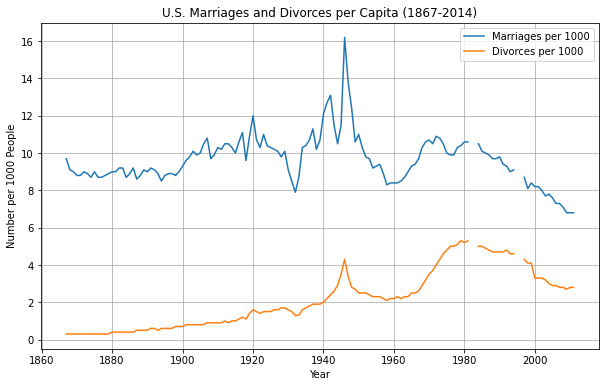

In [52]:
# Create a line plot for marriages and divorces per capita
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000')

# Label the axes
plt.xlabel('Year')
plt.ylabel('Number per 1000 People')

# Add a title and legend
plt.title('U.S. Marriages and Divorces per Capita (1867-2014)')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


# Question 7

In [53]:
# Filter the data for the years 1900, 1950, and 2000
selected_years = data[data['Year'].isin([1900, 1950, 2000])]

selected_years

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
33,1900,709000.0,56000.0,76094000,9.3,0.7
83,1950,1667000.0,385000.0,151684000,11.0,2.5
133,2000,2315000.0,944000.0,282398000,8.2,3.3


In [54]:
# Set the position of the bars on the x-axis
bar_width = 0.35
r1 = range(len(selected_years))
r2 = [x + bar_width for x in r1]

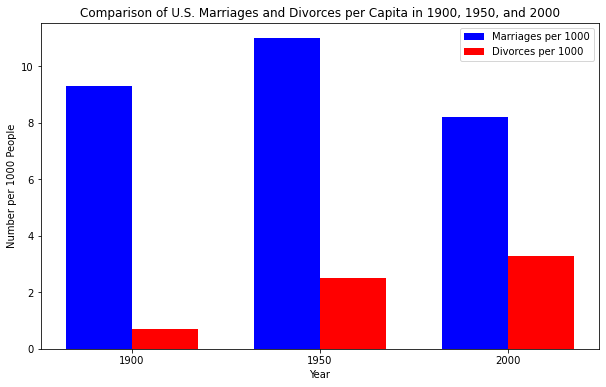

In [55]:
# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, selected_years['Marriages_per_1000'], color='blue', width=bar_width, label='Marriages per 1000')
plt.bar(r2, selected_years['Divorces_per_1000'], color='red', width=bar_width, label='Divorces per 1000')

# Label the axes
plt.xlabel('Year')
plt.ylabel('Number per 1000 People')
plt.xticks([r + bar_width / 2 for r in range(len(selected_years))], selected_years['Year'])

# Add a title and legend
plt.title('Comparison of U.S. Marriages and Divorces per Capita in 1900, 1950, and 2000')
plt.legend()

# Display the chart
plt.show()


# Question 8

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'actor_kill_counts.csv'
actor_kill_data = pd.read_csv(file_path)

actor_kill_data

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


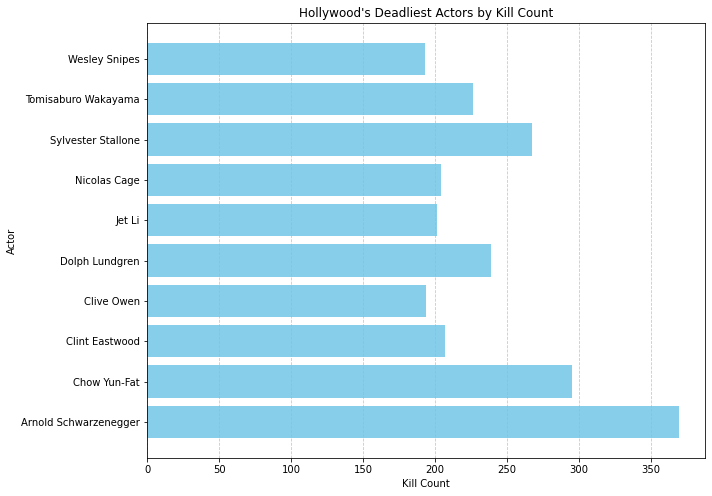

In [57]:
# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(actor_kill_data['Actor'], actor_kill_data['Count'], color='skyblue')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Hollywood\'s Deadliest Actors by Kill Count')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the chart
plt.show()


# Question 9

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'roman-emperor-reigns.csv'
emperor_data = pd.read_csv(file_path)
emperor_data

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


In [59]:
# Determine the number of emperors who were assassinated vs. not assassinated
assassinated = emperor_data['Cause_of_Death'].str.contains('Assassinated').sum()
total_emperors = emperor_data.shape[0]
not_assassinated = total_emperors - assassinated


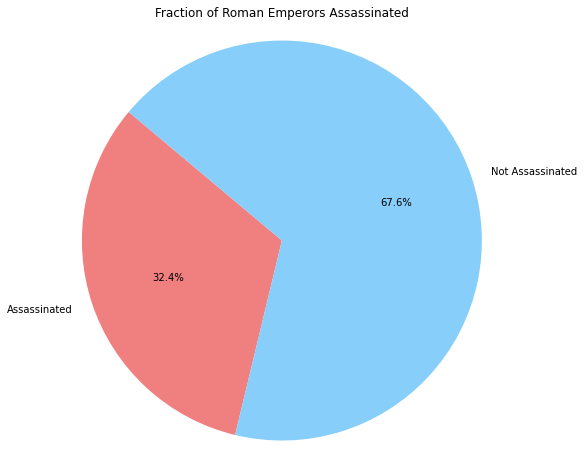

In [60]:
# Data for the pie chart
labels = ['Assassinated', 'Not Assassinated']
sizes = [assassinated, not_assassinated]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Fraction of Roman Emperors Assassinated')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.

# Display the chart
plt.show()


# Question 10

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'arcade-revenue-vs-cs-doctorates.csv'
data = pd.read_csv(file_path)

data

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


In [62]:
# Extract data from the dataframe
years = data['Year']
arcade_revenue = data['Total Arcade Revenue (billions)']
cs_phds = data['Computer Science Doctorates Awarded (US)']

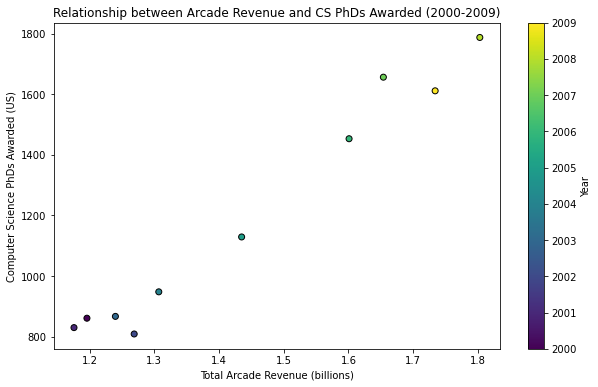

In [63]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(arcade_revenue, cs_phds, c=years, cmap='viridis', edgecolor='k')

# Add colorbar to show the year
colorbar = plt.colorbar(scatter)
colorbar.set_label('Year')

# Label the axes
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science PhDs Awarded (US)')

# Title
plt.title('Relationship between Arcade Revenue and CS PhDs Awarded (2000-2009)')

# Show the plot
plt.show()
